### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №29
Steel Plates Faults Data Set  

Название файла: Faults.NNA 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Steel+Plates+Faults  

Класс: Pastry (столбец No 28) 


***
#### Постановка задачи:
1.         Считайте заданный набор данных из репозитария UCI.

 

2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).

 

3.         Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не более 10).

 

4.         Разбейте набор данных на обучающую и тестовую выборки.

 

5.         Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений.

 

6.         Постройте на основе классификатора деревьев решений ансамблевые классификаторы:

  * BaggingClassifier,

  * RandomForestClassifier,

  * AdaBoostClassifier,
          
    подберите параметры ансамблевых классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений ансамблевых классификаторов.

 

7.         Определите лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.
***

**1.         Считайте заданный набор данных из репозитария UCI.**

In [2]:
import numpy as np
import pandas as pd

url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA"
data = pd.read_csv( url, sep='	', header=None, prefix="V")
print(data[0:5])

     V0    V1       V2       V3    V4  V5   V6      V7  V8   V9  ...     V24  \
0    42    50   270900   270944   267  17   44   24220  76  108  ...  0.8182   
1   645   651  2538079  2538108   108  10   30   11397  84  123  ...  0.7931   
2   829   835  1553913  1553931    71   8   19    7972  99  125  ...  0.6667   
3   853   860   369370   369415   176  13   45   18996  99  126  ...  0.8444   
4  1289  1306   498078   498335  2409  60  260  246930  37  126  ...  0.9338   

      V25     V26  V27  V28  V29  V30  V31  V32  V33  
0 -0.2913  0.5822    1    0    0    0    0    0    0  
1 -0.1756  0.2984    1    0    0    0    0    0    0  
2 -0.1228  0.2150    1    0    0    0    0    0    0  
3 -0.1568  0.5212    1    0    0    0    0    0    0  
4 -0.1992  1.0000    1    0    0    0    0    0    0  

[5 rows x 34 columns]


**2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).**

In [3]:
df = data.replace('?',np.NaN)

print( "Типы:\n", df.dtypes)
print('\nЧисло записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))

print('Число отсутствующих значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

print( 'Количество классов = ',df['V27'].nunique() )
cl1, cl2 = 0, 0
for i in df['V27']:
    if (i == 0.0):
        cl1 += 1
    elif (i == 1.0):
        cl2 += 1
print('Количество записей классов 0 1:',cl1,cl2)

Типы:
 V0       int64
V1       int64
V2       int64
V3       int64
V4       int64
V5       int64
V6       int64
V7       int64
V8       int64
V9       int64
V10      int64
V11      int64
V12      int64
V13      int64
V14    float64
V15    float64
V16    float64
V17    float64
V18    float64
V19    float64
V20    float64
V21    float64
V22    float64
V23    float64
V24    float64
V25    float64
V26    float64
V27      int64
V28      int64
V29      int64
V30      int64
V31      int64
V32      int64
V33      int64
dtype: object

Число записей = 1941
Число признаков = 34
Число отсутствующих значений:
	V0: 0
	V1: 0
	V2: 0
	V3: 0
	V4: 0
	V5: 0
	V6: 0
	V7: 0
	V8: 0
	V9: 0
	V10: 0
	V11: 0
	V12: 0
	V13: 0
	V14: 0
	V15: 0
	V16: 0
	V17: 0
	V18: 0
	V19: 0
	V20: 0
	V21: 0
	V22: 0
	V23: 0
	V24: 0
	V25: 0
	V26: 0
	V27: 0
	V28: 0
	V29: 0
	V30: 0
	V31: 0
	V32: 0
	V33: 0
Количество классов =  2
Количество записей классов 0 1: 1783 158


Все признаки числовые, нет пропущенных значений и есть всего два класса. Число записей одного из классов ощутимо больше другого.

**3.         Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не более 10).**

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop('V27',axis=1)
y = df['V27']

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=666, n_jobs=-1)
et_clf.fit(X, y)
#print(et_clf.oob_score_)
fi = np.array(et_clf.feature_importances_)
print(fi)
best = []
for i in range(len(fi)):
    if (fi[i] > 0.05): # c 0.4 добавятся 16 (700 уникальных) и 28 (2) 
        # класс 27
        if (i > 26):
            best.append(i+1)
        else:
            best.append(i)
        best.append(fi[i])
print('\nЛучшие признаки и класс: ', best)
d = df[['V10','V24','V32','V33', 'V27']]
print(d)
print('\nЧисло уникальных элементов\n', d.nunique())

[0.02296019 0.023092   0.01761905 0.01820748 0.01181391 0.01231643
 0.01340434 0.01048813 0.02577024 0.01536277 0.06589507 0.02091124
 0.02228975 0.02866877 0.01793728 0.02387932 0.04426949 0.01732284
 0.01779675 0.02566609 0.03398395 0.01535055 0.02085732 0.0159831
 0.05767326 0.01663583 0.0160416  0.04729774 0.01931723 0.00558253
 0.03599255 0.10092149 0.15869172]

Лучшие признаки и класс:  [10, 0.06589507423460425, 24, 0.057673264794385455, 32, 0.10092148779318297, 33, 0.15869171554367156]
       V10     V24  V32  V33  V27
0     1687  0.8182    0    0    1
1     1687  0.7931    0    0    1
2     1623  0.6667    0    0    1
3     1353  0.8444    0    0    1
4     1353  0.9338    0    0    1
...    ...     ...  ...  ...  ...
1936  1360 -0.4286    0    1    0
1937  1360 -0.4516    0    1    0
1938  1360 -0.4828    0    1    0
1939  1360 -0.0606    0    1    0
1940  1360 -0.2000    0    1    0

[1941 rows x 5 columns]

Число уникальных элементов
 V10     84
V24    918
V32      2
V33    

Признаки V10 и V24 - лучшие небинарные, буду работать с ними

**4.         Разбейте набор данных на обучающую и тестовую выборки.**

In [5]:
from sklearn.model_selection import train_test_split

test_size=0.3 # тестовая выборка 30%

X0 = d.drop('V27',axis=1)
X = d[['V10','V24']]
y = d['V27']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

       V10     V24
722   1358 -0.6357
1005  1358  0.7954
1274  1353  0.6486
1378  1360 -0.5714
1263  1360  0.4878
...    ...     ...
1130  1356  0.0000
1294  1687  0.5454
860   1366  0.5333
1459  1692  0.1000
1126  1360  0.2593

[1358 rows x 2 columns]        V10     V24
1605  1687  0.3273
1502  1692  0.5581
70    1658  0.1539
976   1352  0.5625
1052  1624  0.1111
...    ...     ...
1193  1320  0.5789
1552  1350  0.1818
1922  1362 -0.0769
1903  1692 -0.8000
1004  1658 -0.4000

[583 rows x 2 columns] 722     0
1005    0
1274    0
1378    0
1263    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: V27, Length: 1358, dtype: int64 1605    0
1502    0
70      1
976     0
1052    0
       ..
1193    0
1552    0
1922    0
1903    0
1004    0
Name: V27, Length: 583, dtype: int64


**5.         Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений.**

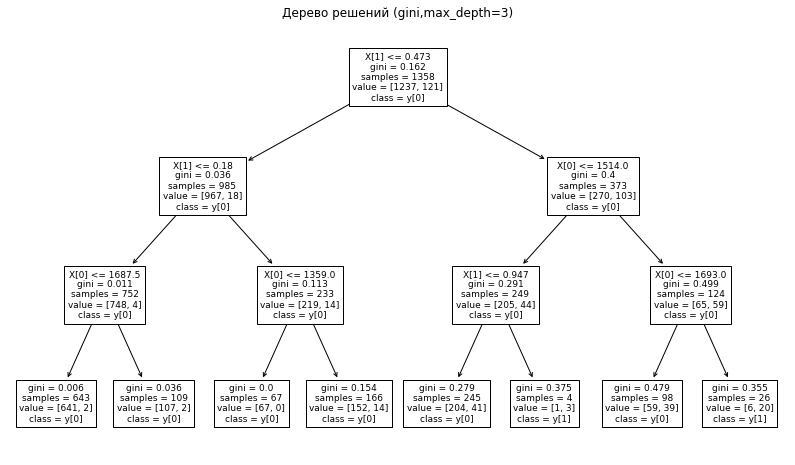

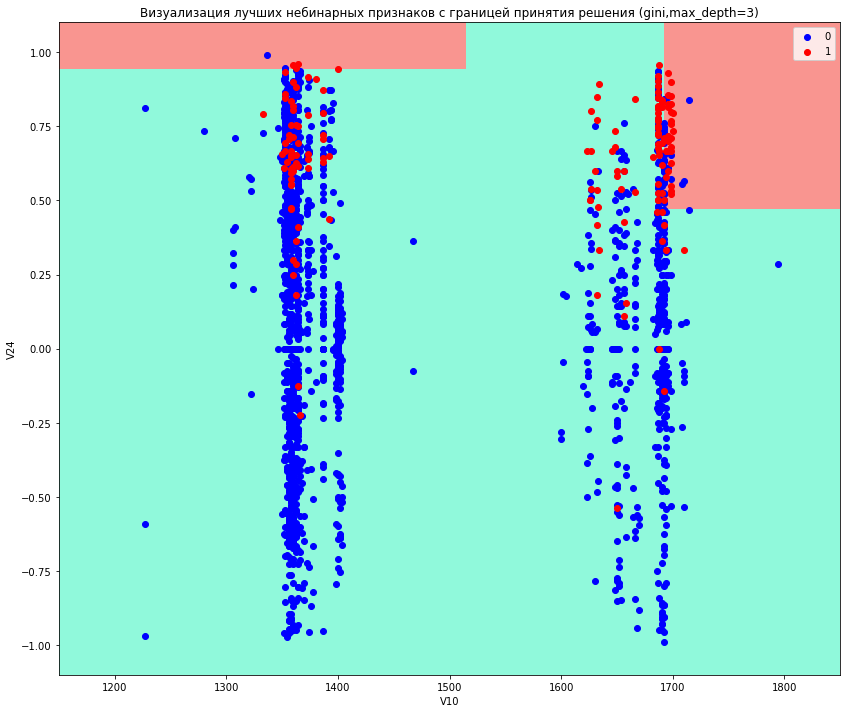

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)  
dt_clf.fit(X_train, y_train);

import matplotlib.pyplot as plt   
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(dt_clf,class_names=True); 
plt.title('Дерево решений (gini,max_depth=3)')
plt.show()

# для рисовния
xp = np.array(X)
yp = np.array(y)

# Функция визуализации границы принятия решения и точек набора
def plot_decision_boundary(model, axis): 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#90f9db','#f99590'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    plt.scatter(xp[yp==0,0], xp[yp==0,1], color="blue", label=0)
    plt.scatter(xp[yp==1,0], xp[yp==1,1], color="red", label=1)
    plt.legend()
    plt.xlabel('V10')
    plt.ylabel('V24')
    plt.show()
    
# Визуализация
plt.figure(figsize=(14,12))
plt.title('Визуализация лучших небинарных признаков с границей принятия решения (gini,max_depth=3)')
plot_decision_boundary(dt_clf, axis=[1150, 1850, -1.1, 1.1])

По дереву видно, что 1 класс был впервые распознан только на четвёртом уровне глубины. 

Со значением max_depth по умолчанию сильно повышается глубина дерева. Визуализация показывает, что больше точек 1 класса стало учтено.

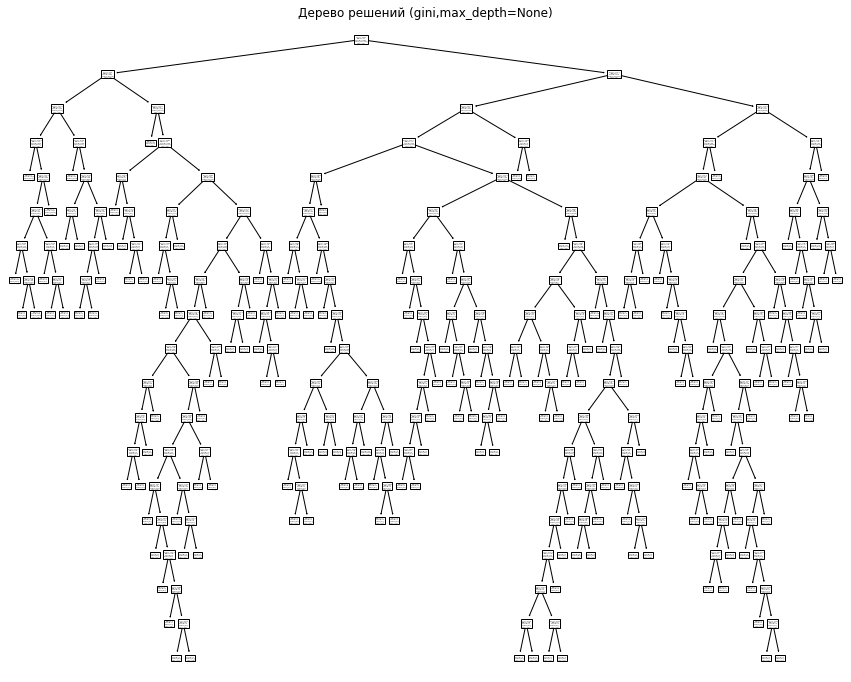

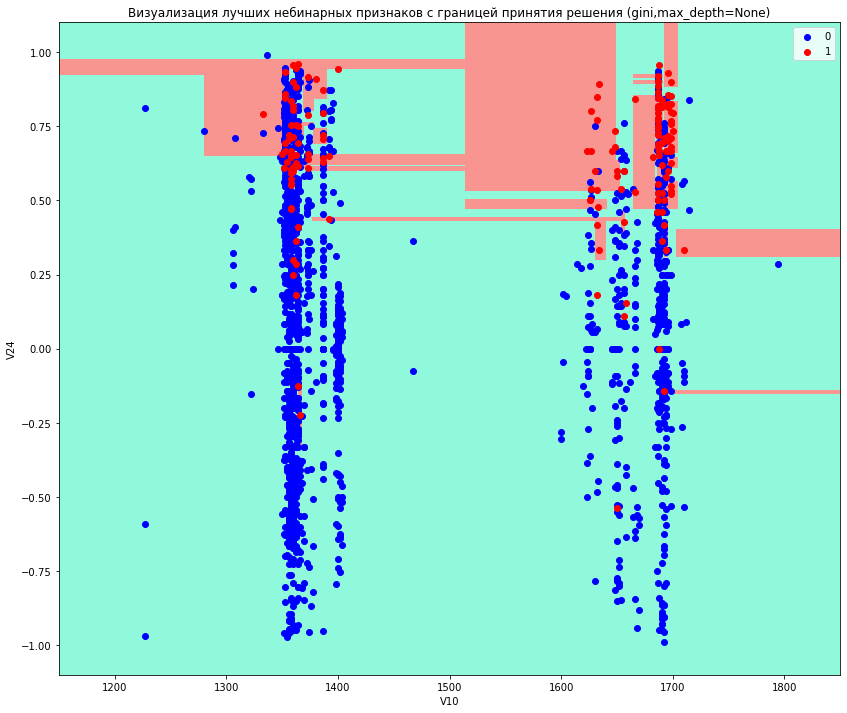

Wall time: 18.2 s


In [6]:
%%time
dt_clf0 = DecisionTreeClassifier(random_state=42)  
dt_clf0.fit(X_train, y_train);
plt.figure(figsize=(15,12))
plot_tree(dt_clf0,class_names=True); 
plt.title('Дерево решений (gini,max_depth=None)')
plt.show()
plt.figure(figsize=(14,12))
plt.title('Визуализация лучших небинарных признаков с границей принятия решения (gini,max_depth=None)')
plot_decision_boundary(dt_clf0, axis=[1150, 1850, -1.1, 1.1])
plt.show()

Теперь рисую всё то же самое, но с ипользованием в качестве критерия энтропии, а не критерия Джини. 

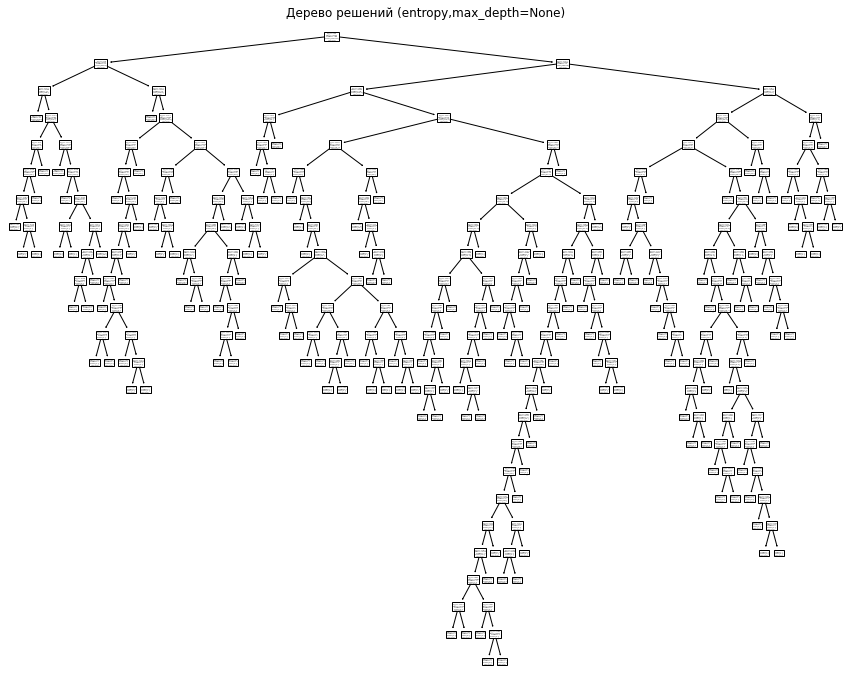

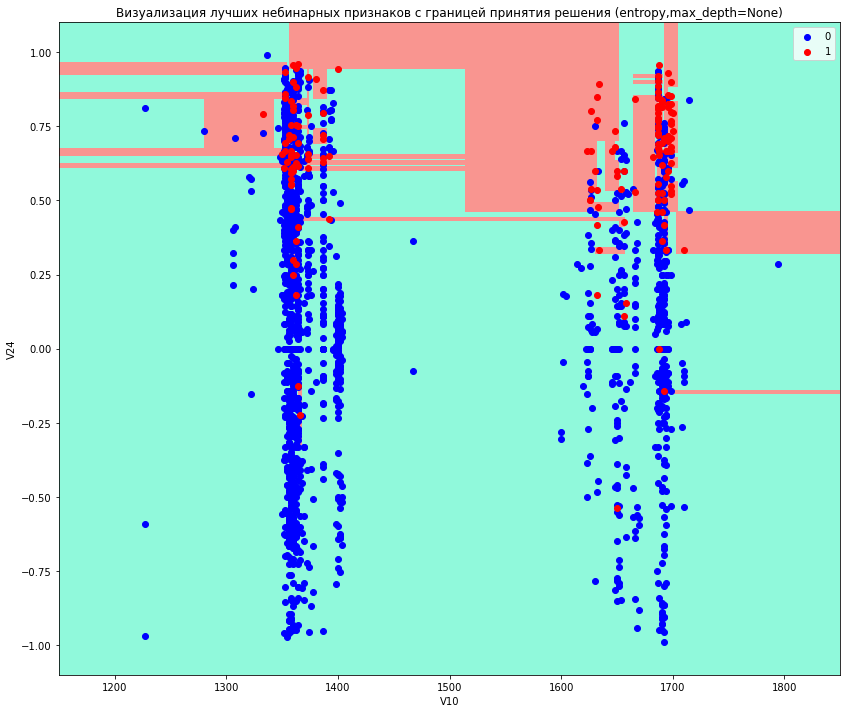

Wall time: 18.9 s


In [7]:
%%time
dt_clf_e = DecisionTreeClassifier(criterion="entropy",random_state=42)  
dt_clf_e.fit(X_train, y_train);
plt.figure(figsize=(15,12))
plot_tree(dt_clf_e,class_names=True); 
plt.title('Дерево решений (entropy,max_depth=None)')
plt.show()
plt.figure(figsize=(14,12))
plt.title('Визуализация лучших небинарных признаков с границей принятия решения (entropy,max_depth=None)')
plot_decision_boundary(dt_clf_e, axis=[1150, 1850, -1.1, 1.1])
plt.show()

In [8]:
print('\nТочность классификации')
print('\tgini,max_depth=3       = ',dt_clf.score(X_test, y_test))
print('\tgini,max_depth=None    = ',dt_clf0.score(X_test, y_test))
print('\tentropy,max_depth=None = ',dt_clf_e.score(X_test, y_test))


Точность классификации
	gini,max_depth=3       =  0.9433962264150944
	gini,max_depth=None    =  0.8936535162950258
	entropy,max_depth=None =  0.9039451114922813


Точек класса 0 значительно больше, чем класса 1, многие точки разных классов накладываются друг на друга. Так что лучшее выделение класса 1 привело к большему числу ошибок классификации в целом.

**6. Ансамблевые классификаторы на основе классификатора деревьев решений: BaggingClassifier, RandomForestClassifier, AdaBoostClassifier. Подберите параметры ансамблевых классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений ансамблевых классификаторов.**

**BaggingClassifier**

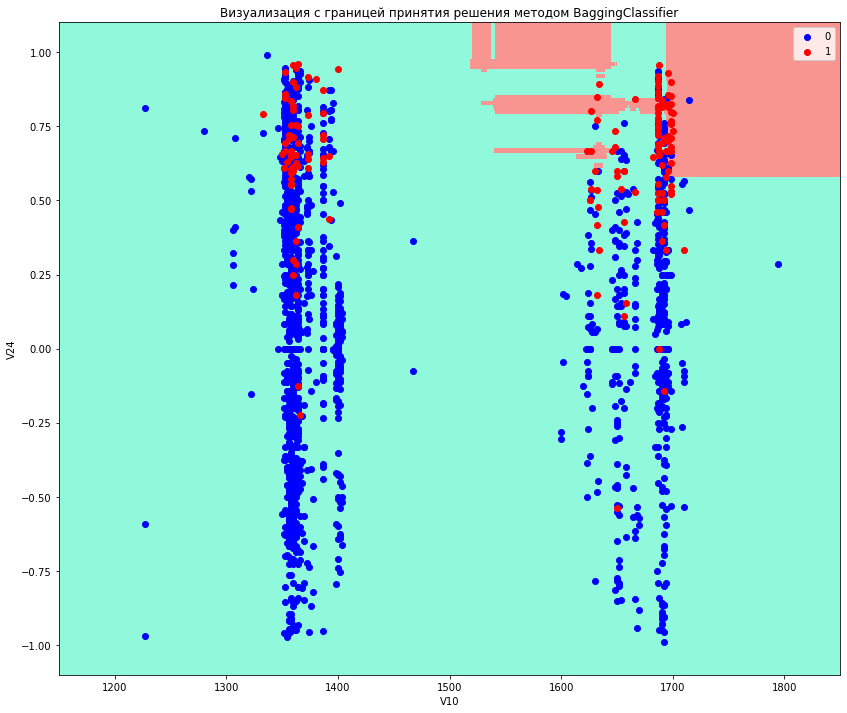

--- 320.7444190979004 seconds ---
Wall time: 5min 20s


In [9]:
%%time
from sklearn.ensemble import BaggingClassifier
import time
start_time = time.time()
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=True, oob_score=True, n_jobs=2)
bagging_clf.fit(X_train, y_train)

plt.figure(figsize=(14,12))
plt.title('Визуализация с границей принятия решения методом BaggingClassifier')
plot_decision_boundary(bagging_clf, axis=[1150, 1850, -1.1, 1.1])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

**RandomForestClassifier**

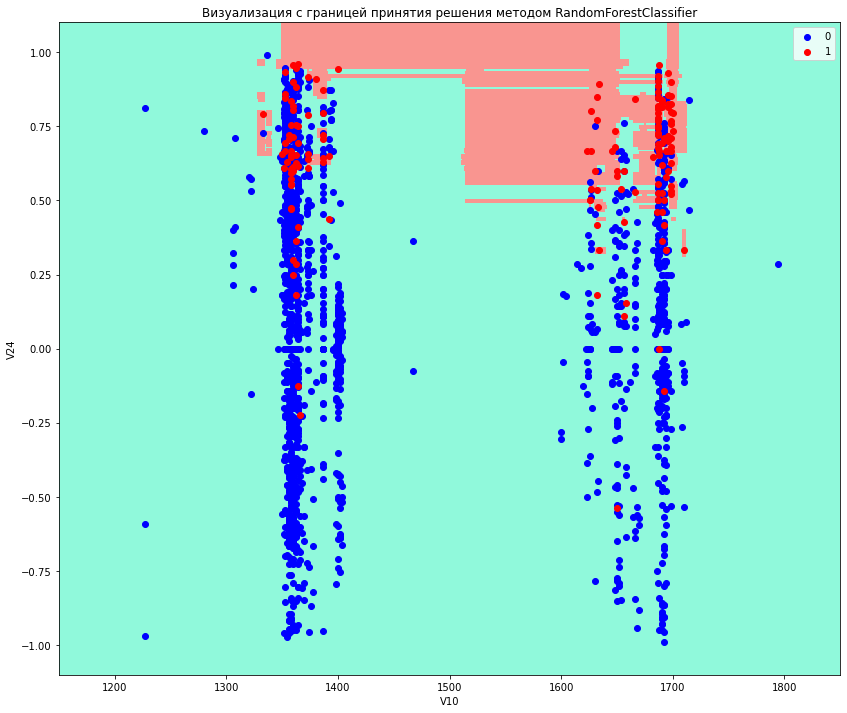

--- 258.37955141067505 seconds ---
Wall time: 4min 18s


In [10]:
%%time
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=666, n_jobs=2)
rf_clf.fit(X_train, y_train)

plt.figure(figsize=(14,12))
plt.title('Визуализация с границей принятия решения методом RandomForestClassifier')
plot_decision_boundary(rf_clf, axis=[1150, 1850, -1.1, 1.1])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

**AdaBoostClassifier**

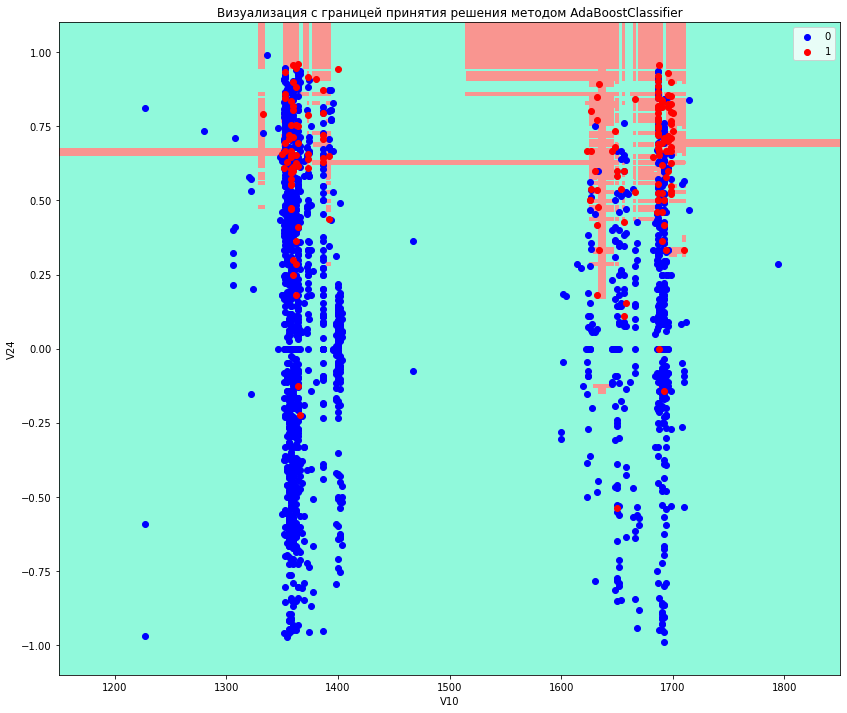

--- 959.8587186336517 seconds ---
Wall time: 15min 59s


In [11]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start_time = time.time()
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)

plt.figure(figsize=(14,12))
plt.title('Визуализация с границей принятия решения методом AdaBoostClassifier')
plot_decision_boundary(ada_clf, axis=[1150, 1850, -1.1, 1.1])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

Из критериев я меняла n_jobs, что дало ощутимый выигрыш в скорости исполнения, но немного ухудшило точность классификации (на несколько тысячных). Каких-то принципиальных улучшений на таком наборе не получить. (Количество записей классов 0 1: 1783 158) 

**7.         Определите лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.**

In [12]:
print('Точность классификации')
print('\tBaggingClassifier      = ',bagging_clf.score(X_test, y_test))
print('\tRandomForestClassifier = ',rf_clf.score(X_test, y_test))
print('\tAdaBoostClassifier     = ',ada_clf.score(X_test, y_test))

Точность классификации
	BaggingClassifier      =  0.9451114922813036
	RandomForestClassifier =  0.9056603773584906
	AdaBoostClassifier     =  0.8987993138936535


Лучшим ансамблевым классификатором из рассмотренных выше оказался BaggingClassifier.